In [5]:
import torch
#print("GPU verfügbar:", torch.cuda.is_available())
#print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")
symbol  = "SLDP"

import datetime
import pandas as pd
#from yahooquery import Ticker
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# Fetch historical Tesla stock data using yahooquery

#end= "2025-01-01",
#historical_data = ticker.history(  start= "2020-01-01",  interval='1d')

folderpath_models ="/Users/Shared/ai_work/Trainingdata/models/autogluon/"
folderpath_traininglogs =" /Users/Shared/ai_work/Trainingdata/models/neuralprophet/traininglogs/"
#folderpath_charts = "D:\\OneDrive\\AI Workspace\\models\\neuralprophet\\charts\\"
folderpath_historie = "/Users/Shared/ai_work/Trainingdata/ml_data/yh_his/D1/"
folderpath_auto_models ="/Users/Shared/ai_work/Trainingdata/models//autogluon/"
#folderpath_analyse = "D:\\OneDrive\\AI Workspace\\results\\neuralprophet\\"
#folderpath_results = "D:\\OneDrive\\AI Workspace\\results\\nrp_results\\"


# 🟢 Step 1: Download Tesla stock data
#ticker = "TSLA"



#df = yf.download(ticker, period="5y", interval="1d")
data = pd.read_csv (folderpath_historie+symbol+".csv")
df_his = data.copy()
#historical_data = ticker.history(  period="max")
# Clean and prepare the data
#data = historical_data.reset_index()

data = data[['date', 'close']]
data.rename(columns={'date': 'timestamp', 'close': 'item_value'}, inplace=True)
lastBars = 0
n_tail = 400  #600
#data = df.copy()
df = data[:len(data) - lastBars]
if n_tail > 0: df = df.tail(n_tail)
df = df.reset_index()

print (df)
df['item_id'] = symbol
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a TimeSeriesDataFrame for AutoGluon
train_data = TimeSeriesDataFrame(df)

# Define the prediction length (100 days)
prediction_length = 100

# Train the AutoGluon model, explicitly setting the frequency
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    #path="AutogluonPredictor/",
    path=folderpath_auto_models +symbol+"//",
    #"D://OneDrive//AI Workspace//workspaces//dev_ws1//AutoGluon//AutogluonPredictor//models//",
    target="item_value",
    eval_metric="RMSE",
    freq="D" # Set the frequency to daily ('D')
)


predictor.fit(
    train_data,
    presets="best_quality",
    time_limit=300
)




# ... (rest of your prediction and plotting code)

# Generate predictions for the next 100 days
predictions = predictor.predict(train_data)

# Create a future dataframe for the next 100 days
future_timestamps = pd.date_range(
    start=df['timestamp'].max() + pd.Timedelta(days=1),
    periods=prediction_length,
    freq='D'
)

future_df = pd.DataFrame({'timestamp': future_timestamps})
future_df['item_id'] = 'TSLA'
future_df = TimeSeriesDataFrame(future_df)

# Predict the future values
future_predictions = predictor.predict(train_data, known_covariates=future_df)

# Combine the results for easier viewing
combined_results = pd.concat([
    df[['timestamp', 'item_value']],
    future_predictions.reset_index().rename(columns={'mean': 'predicted_value'})[['timestamp', 'predicted_value']]
], ignore_index=True)

# Print the last 100 predicted values
print(combined_results.tail(100))

#Optional: Plot the results
import matplotlib.pyplot as plt


Beginning AutoGluon training... Time limit = 300s
AutoGluon will save models to '/Users/Shared/ai_work/Trainingdata/models/autogluon/SLDP'
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun  5 18:30:46 UTC 2025
CPU Count:          32
GPU Count:          1
Memory Avail:       22.79 GB / 31.29 GB (72.8%)
Disk Space Avail:   172.77 GB / 1858.19 GB (9.3%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'freq': 'D',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 100,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'item_value',
 'time_limit': 300,
 'verbosity': 2}

train_data with frequ

     index   timestamp  item_value
0      745  2024-05-03        1.82
1      746  2024-05-06        1.91
2      747  2024-05-07        1.79
3      748  2024-05-08        1.74
4      749  2024-05-09        1.77
..     ...         ...         ...
395   1140  2025-12-01        4.87
396   1141  2025-12-02        4.89
397   1142  2025-12-03        5.07
398   1143  2025-12-04        5.41
399   1144  2025-12-05        5.17

[400 rows x 3 columns]


Provided train_data has 582 rows (NaN fraction=31.3%), 1 time series. Median time series length is 582 (min=582, max=582). 

Provided data contains following columns:
	target: 'item_value'
	past_covariates:
		categorical:        []
		continuous (float): ['index']

To learn how to fix incorrectly inferred types, please see documentation for TimeSeriesPredictor.fit

AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-12-06 20:07:11
Models that will be trained: ['SeasonalNaive', 'RecursiveTabular', 'DirectTabular', 'NPTS', 'DynamicOptimizedTheta', 'AutoETS', 'ChronosZeroShot[bolt_base]', 'ChronosFineTuned[bolt_small]', 'TemporalFusionTransformer', 'DeepAR', 'PatchTST', 'TiDE']
Training timeseries model SeasonalNaive. Training for up to 23.0s of the 298.9s of remaining time.
	-1.6107       

     timestamp  item_value  predicted_value
400 2025-12-06         NaN         4.559711
401 2025-12-07         NaN         4.520716
402 2025-12-08         NaN         4.379684
403 2025-12-09         NaN         4.483616
404 2025-12-10         NaN         4.648605
..         ...         ...              ...
495 2026-03-11         NaN         8.048584
496 2026-03-12         NaN         8.278002
497 2026-03-13         NaN         8.136235
498 2026-03-14         NaN         8.278433
499 2026-03-15         NaN         8.253042

[100 rows x 3 columns]


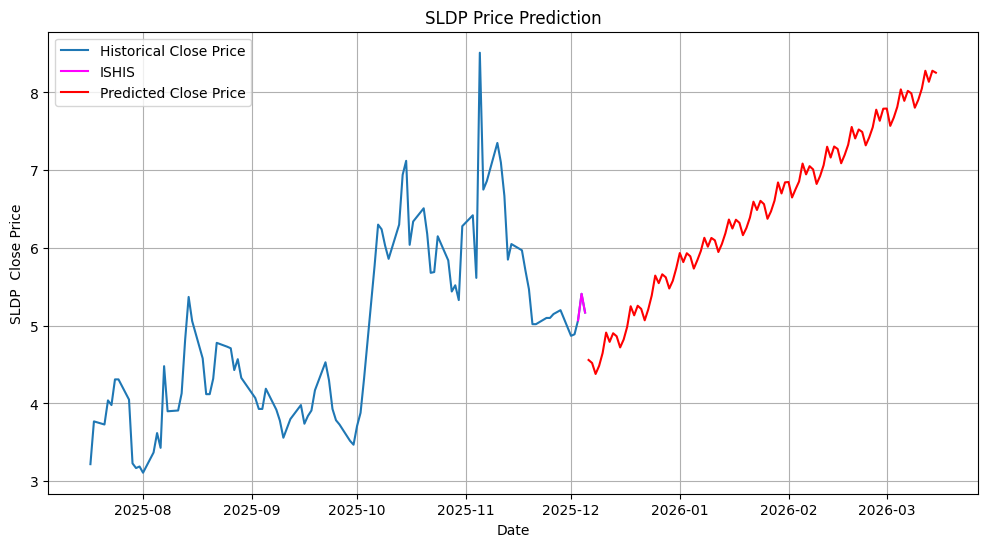

In [6]:
combined_results = combined_results.tail(200)  # Limit to the last 200 entries for better visualization
df_his = df_his.tail(lastBars+3)  # Limit to the last 200 entries for better visualization
df_his['date'] = pd.to_datetime(df_his['date'])
plt.figure(figsize=(12, 6))
plt.plot(combined_results['timestamp'], combined_results['item_value'], label='Historical Close Price')
plt.plot(df_his['date'], df_his['close'], label='ISHIS', color='magenta')
plt.plot(combined_results['timestamp'].tail(100), combined_results['predicted_value'].tail(100), label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel( symbol + '  Close Price')
plt.title( symbol + ' Price Prediction')
plt.legend()
plt.grid(True)
plt.show()